# Analyzing the Hotel Bookings Data Set using Python

By: Thomas Simon

First, we'll start with inputting the Python libraries.

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
import matplotlib.axes as ax
from matplotlib.dates import DateFormatter
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

**Data Cleansing**

The data set already looks clean, so we'll move to understanding the insights.

**Insights**

Here, we'll look at a descriptive overview of the dataset and it's respective columns.

In [4]:
dataframe_raw = pd.read_csv("Hotel Bookings - Capstone 2 Data Set, Thomas Simon.csv", header = 0)
dataframe_raw.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [51]:
dataframe_raw.groupby('arrival_date_month').sum().reset_index()

,arrival_date_month,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,April,4524,1051491,22361085,177392,180852,10520,26815,20806,1141.0,...,283,472,1427,2503,877243.0,134285.0,33405,1113122.58,633,5783
1,August,5239,1681028,27977068,463805,217742,14716,39361,27795,2780.0,...,223,948,774,3674,1107060.0,28659.0,5533,1944327.60,1000,10223
2,December,2371,498746,13665560,346440,108822,5865,15984,12382,736.0,...,314,631,1256,1596,509016.0,57622.0,20391,549700.54,502,4163
3,February,2696,386131,16269265,59795,127071,6883,17572,14450,790.0,...,411,607,1427,1548,562001.0,156216.0,6171,593661.80,509,4241
4,January,1807,268643,11956545,17711,95560,4621,12997,10024,452.0,...,397,530,1807,1469,462901.0,91852.0,14979,417171.80,491,3246
5,July,4742,1725980,25527113,367133,203974,14184,35521,25164,2322.0,...,301,1476,1600,2756,1044177.0,48350.0,2911,1605263.03,869,8505
6,June,4535,1402897,22058671,268613,165390,10068,29048,20353,1057.0,...,282,236,1703,2103,888463.0,85234.0,21387,1276277.11,609,6169
7,March,3149,686748,19749674,113515,159987,8410,25079,17675,700.0,...,426,266,1806,2173,723446.0,158391.0,13486,790176.45,603,4872
8,May,4677,1387166,23776969,239006,189001,10254,28380,21539,845.0,...,366,216,1831,2561,897372.0,151826.0,51162,1281628.83,614,6280
9,November,2122,520290,13694364,316990,98052,5334,16333,11488,279.0,...,293,263,1084,1690,525705.0,157413.0,12010,501362.97,457,3949


Next, we'll look at the number of cancellations for specifically months April through August as they tend to have the greatest amount of cancellations total.

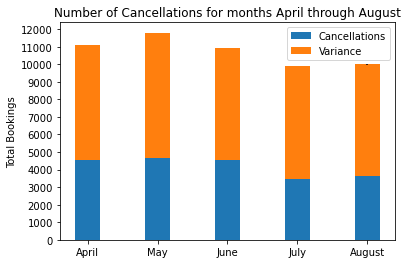

In [5]:
N = 5
cancellations = (4524, 4677, 4535, 3483, 3641)
variance = (6565, 7114, 6404, 6402, 6347)
cancellationsStd = (2, 3, 4, 1, 2)
varianceStd = (3, 5, 2, 3, 3)
ind = np.arange(N)
width = 0.35       

p1 = plt.bar(ind, cancellations, width, yerr=cancellationsStd)
p2 = plt.bar(ind, variance, width,
             bottom=cancellations, yerr=varianceStd)

plt.ylabel('Total Bookings')
plt.title('Number of Cancellations for months April through August')
plt.xticks(ind, ('April', 'May', 'June', 'July', 'August'))
plt.yticks(np.arange(0, 13000, 1000))
plt.legend((p1[0], p2[0]), ('Cancellations', 'Variance'))

plt.show()

In [ ]:
#Make y-axis a percentage out of 100 to better showcase proportion of each month's cancellations to bookings

In [ ]:
#Look up Group by in pandas

Then, we'll take a look at the total number of cancellations by market segment.

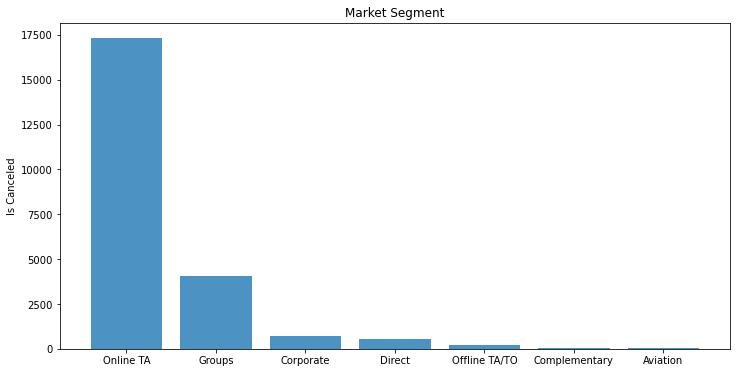

In [59]:
objects = ('Online TA', 'Groups', 'Corporate', 'Direct', 'Offline TA/TO', 'Complementary', 'Aviation')
y_pos = np.arange(len(objects))
performance = [17317,4086,696,548,201,72,46]

f, ax = plt.subplots(figsize=(12,6))
plt.bar(y_pos, performance, align='center', alpha=0.8)
plt.xticks(y_pos, objects)
plt.ylabel('Is Canceled')
plt.title('Market Segment')

plt.show()

After that, we'll make a pie chart to understand which market segments most incur revenue loss as a result of these cancellations.

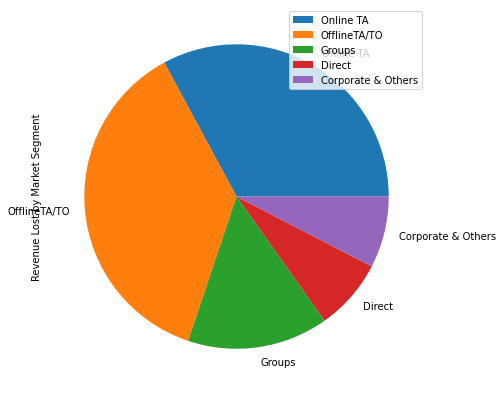

In [61]:
df = pd.DataFrame({'Revenue Lost by Market Segment': [4.330, 4.87 , 1.97, 1, 1],
                   'radius': [2439.7, 3051.8, 3378.1, 1, 1]},
                  index=['Online TA', 'OfflineTA/TO', 'Groups','Direct', 'Corporate & Others'])
plot = df.plot.pie(y='Revenue Lost by Market Segment', figsize=(7, 7))

Lastly, we'll make a line chart to look into City Hotels and how cancellations play a role month to month.

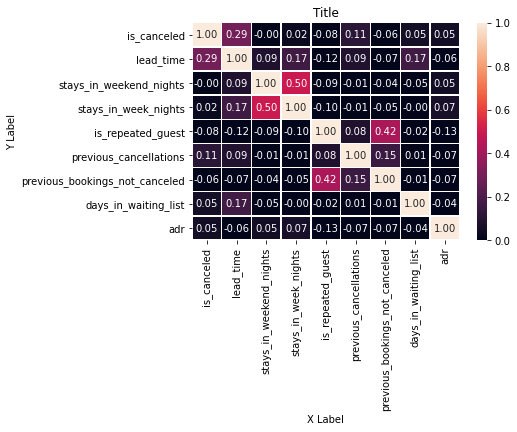

In [28]:
dataframe_raw = pd.read_csv("Hotel Bookings - Capstone 2 Data Set, Thomas Simon.csv", header = 0)

dataframe_heatmap = dataframe_raw
dataframe_heatmap = dataframe_heatmap.drop(columns=['booking_changes','required_car_parking_spaces','total_of_special_requests','children','adults','babies','agent','company','arrival_date_day_of_month','reservation_status_date', 'arrival_date_year', 'arrival_date_week_number'])
dataframe_heatmap = dataframe_heatmap.corr()
ax = sns.heatmap(dataframe_heatmap, vmin=0, vmax=1, annot=True, fmt=".2f", linewidths=.5)
plt.title("Title")
plt.xlabel("X Label")
plt.ylabel("Y Label")
plt.show()

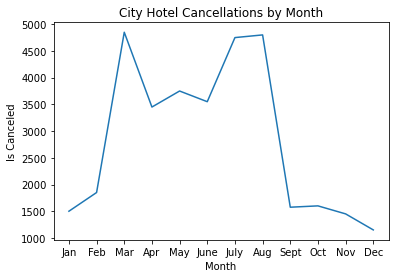

In [8]:
Month = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
Unemployment_Rate = [1500,1850,4850,3450,3750,3550,4750,4800,1575,1600,1450,1150]
  
plt.plot(Month, Unemployment_Rate)
plt.title('City Hotel Cancellations by Month')
plt.xlabel('Month')
plt.ylabel('Is Canceled')
plt.show()

# Making a Regression

Model against "Is_Canceled" column

In [34]:
dataframe_raw.drop(['reservation_status'], axis=1).columns
X = dataframe_raw.drop(columns=['booking_changes','required_car_parking_spaces','total_of_special_requests','children','adults','babies','agent','company','arrival_date_day_of_month', 'arrival_date_year', 'arrival_date_week_number'])
X = sm.add_constant(X)

Y = dataframe_raw['is_canceled']
OLSmodel = sm.OLS(Y,X)

OLSmodelResult = OLSmodel.fit()

results1 = OLSmodelResult
results1.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).